In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare data for stacked bar chart with top 5 increasing and decreasing categories
def prepare_top_changes_data(df, group_cols):
    # Group and count data
    grouped = df.groupby(group_cols).size().reset_index(name='counts')
    # Pivot for easy calculations
    pivot_data = grouped.pivot(index=group_cols[0], columns=group_cols[1], values='counts').fillna(0)
    # Calculate the change
    change = pivot_data.iloc[-1] - pivot_data.iloc[0]
    # Get top 5 increasing and decreasing
    top_increasing = change.nlargest(5).index.tolist()
    top_decreasing = change.nsmallest(5).index.tolist()
    # Filter data for these top categories
    filtered_grouped = grouped[grouped[group_cols[1]].isin(top_increasing + top_decreasing)]
    return filtered_grouped

# Function to plot stacked bar chart
def plot_stacked_bar(data, index_col, column_col, title=''):
    pivot_data = data.pivot(index=index_col, columns=column_col, values='counts')
    pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Total Count')
    plt.show()

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Convert 'date_added' to datetime and extract the year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Handling missing data
df['year_added'].fillna(df['release_year'], inplace=True)


print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-0

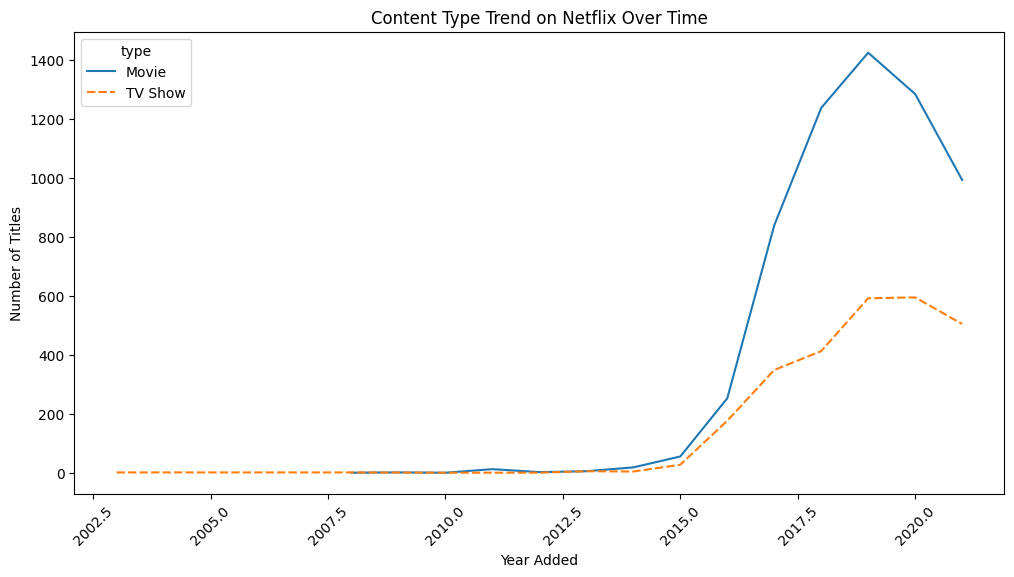

In [12]:
# Group by year and type
type_trends = df.groupby(['year_added', 'type']).size().reset_index(name='counts')

# Pivot data for plotting
pivot_type_trends = type_trends.pivot(index='year_added', columns='type', values='counts')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_type_trends)
plt.title('Content Type Trend on Netflix Over Time')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.show()

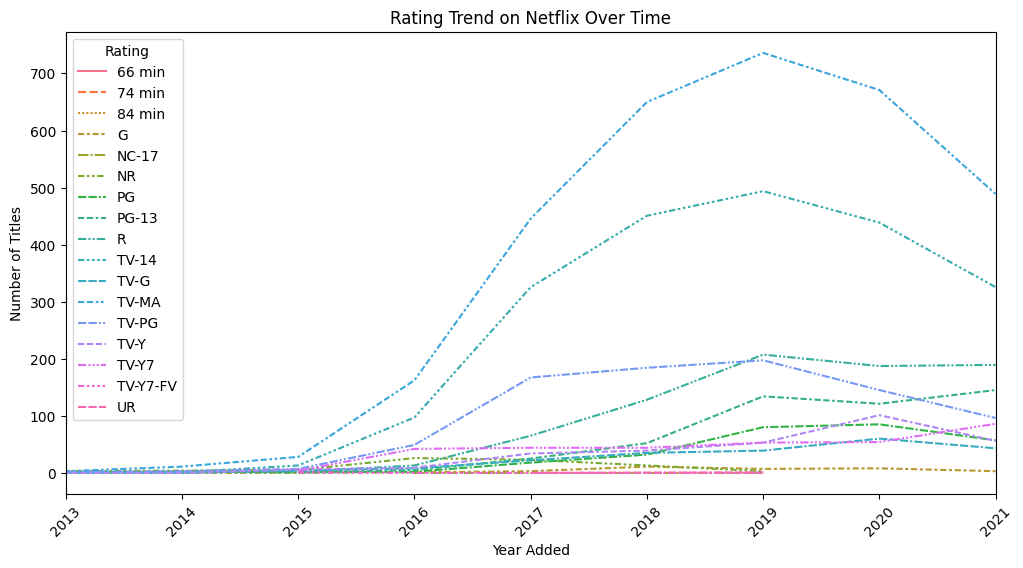

In [20]:
# Ratings Trend
rating_trends = df.groupby(['year_added', 'rating']).size().reset_index(name='counts')

# Pivot data for plotting
pivot_rating_trends = rating_trends.pivot(index='year_added', columns='rating', values='counts')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_rating_trends)
plt.title('Rating Trend on Netflix Over Time')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.legend(title='Rating', loc='upper left')
plt.xlim(2013, 2021)
plt.show()

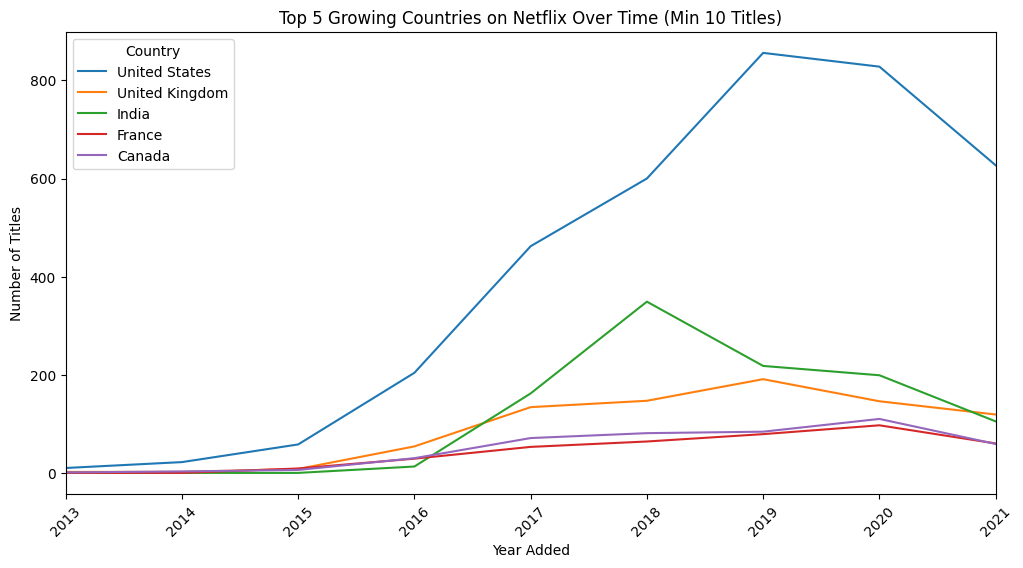

In [21]:
# Country-wise Content Trend
country_data = df[df['country'].notna()]
country_data = country_data.assign(value=country_data['country'].str.split(', ')).explode('value')

# Filter countries based on minimum title count
min_title_count = 10
filtered_country_data = country_data.groupby('value').filter(lambda x: len(x) >= min_title_count)

# Calculate Yearly Counts for each country
yearly_country_counts = filtered_country_data.groupby(['year_added', 'value']).size().unstack(fill_value=0)

# Analyze Growth and Decline
growth = yearly_country_counts.iloc[-1] - yearly_country_counts.iloc[0]
top_growing_countries = growth.nlargest(5)
top_declining_countries = growth.nsmallest(5)

# Visualize the Trends for Top Growing Countries
top_growing_countries_df = yearly_country_counts[top_growing_countries.index]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_growing_countries_df, dashes=False)
plt.title('Top 5 Growing Countries on Netflix Over Time (Min 10 Titles)')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper left')
plt.xlim(2013, 2021)
plt.show()

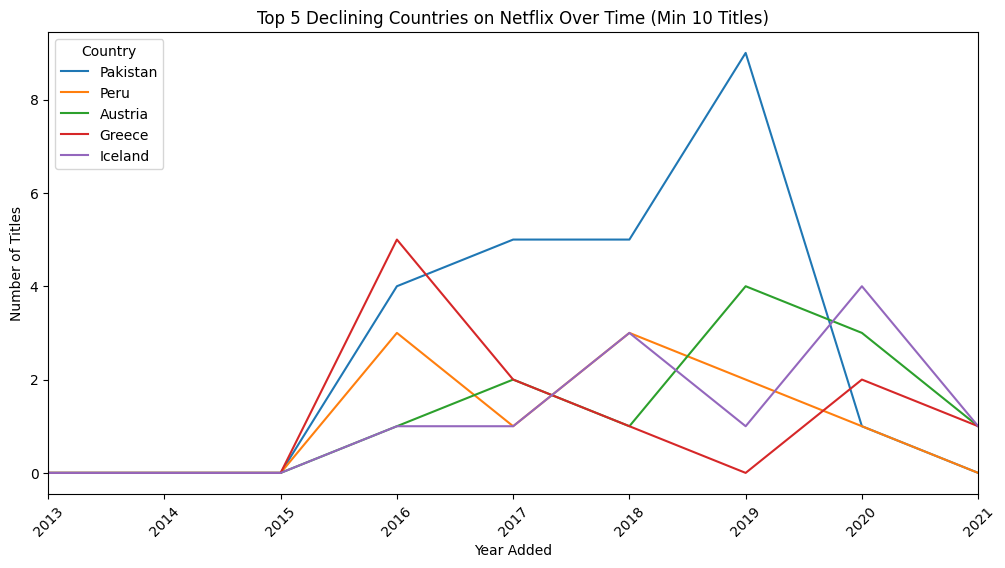

In [22]:
# Visualize the Trends for Top Declining Countries
top_declining_countries_df = yearly_country_counts[top_declining_countries.index]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_declining_countries_df, dashes=False)
plt.title('Top 5 Declining Countries on Netflix Over Time (Min 10 Titles)')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.legend(title='Country', loc='upper left')
plt.xlim(2013, 2021)
plt.show()


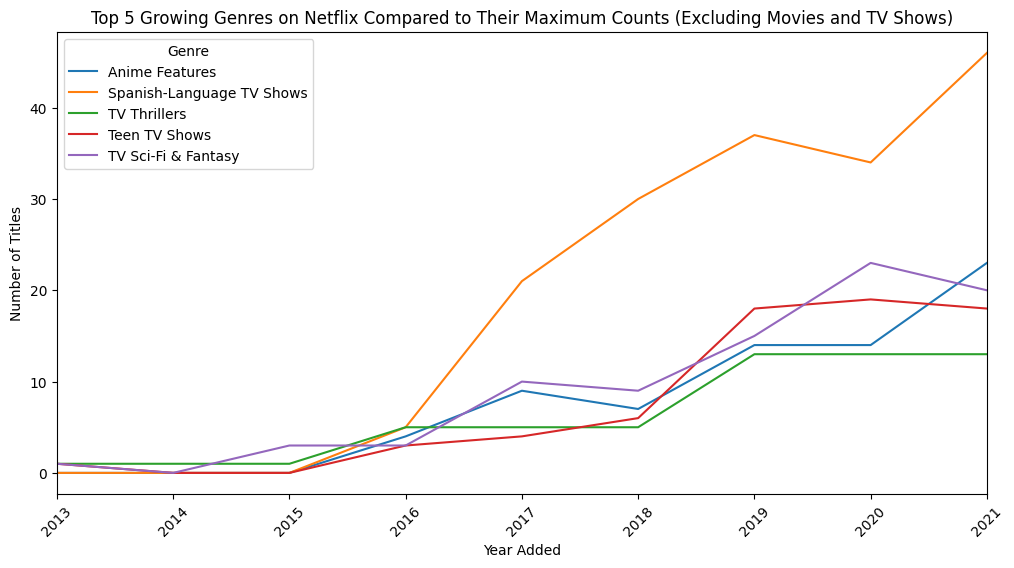

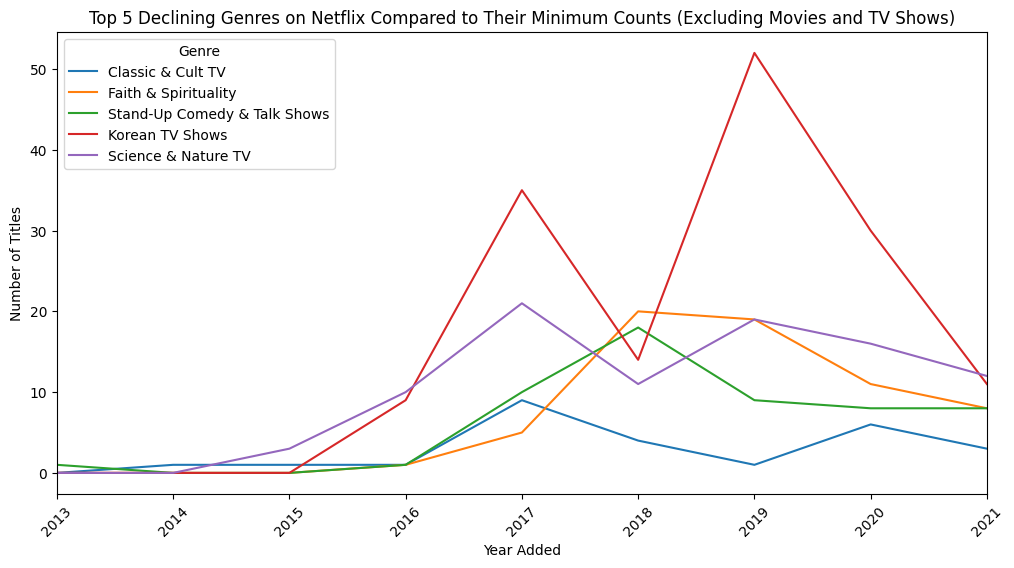

In [29]:
# Splitting the genres for each title and excluding 'Movie' and 'TV Shows'
genre_data = df[df['listed_in'].notna()]
genre_data = genre_data.assign(value=genre_data['listed_in'].str.split(', ')).explode('value')
genre_data = genre_data[~genre_data['value'].isin(['Movies', 'TV Shows'])]  # Exclude 'Movies' and 'TV Shows'

# Calculate Yearly Counts for each genre
yearly_genre_counts = genre_data.groupby(['year_added', 'value']).size().unstack(fill_value=0)

# Find max and min counts for each genre
max_counts = yearly_genre_counts.max()
min_counts = yearly_genre_counts.min()
current_counts = yearly_genre_counts.iloc[-1]

# Calculate Growth and Decline from max and min to current
growth_from_max = current_counts - max_counts
decline_from_min = current_counts - min_counts

# Identify Top 5 Growing and Declining Genres
top_growing_genres = growth_from_max.nlargest(5)
top_declining_genres = decline_from_min.nsmallest(5)

# Visualize the Trends for Top Growing Genres
top_growing_genres_df = yearly_genre_counts[top_growing_genres.index]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_growing_genres_df, dashes=False)
plt.title('Top 5 Growing Genres on Netflix Compared to Their Maximum Counts (Excluding Movies and TV Shows)')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.legend(title='Genre', loc='upper left')
plt.xlim(2013, 2021)
plt.show()

# Visualize the Trends for Top Declining Genres
top_declining_genres_df = yearly_genre_counts[top_declining_genres.index]
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_declining_genres_df, dashes=False)
plt.title('Top 5 Declining Genres on Netflix Compared to Their Minimum Counts (Excluding Movies and TV Shows)')
plt.ylabel('Number of Titles')
plt.xlabel('Year Added')
plt.xticks(rotation=45)
plt.legend(title='Genre', loc='upper left')
plt.xlim(2013, 2021)
plt.show()